#  Brain-body-behavior descriptors ME

## Task and reference performance
**Walker-v0** -> walk forward on an even terrain; usual performance around 8-10

## Descriptors recap
- Brain: (1) one arity functions / n nodes, (2) two arity functions / n nodes
- Body: (1) elongation, (2) n voxels / n max voxels
- Behavior: (1) y-velocity (median of fft), (2) % of contact with ground

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from scipy.stats import ranksums
%matplotlib inline

/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.decl

In [2]:
dfs = []
for sampler in ["all", "s1", "s2", "s3"]:  #, "me"]:
    for seed in range(10):
        try:
            tmp_df = pd.read_csv(f"../results/me/evo-body-10x10-floor-{sampler}_{seed}.csv")
            tmp_df["sampler"] = sampler
            tmp_df["seed"] = seed
            dfs.append(tmp_df)
        except FileNotFoundError:
            print(sampler, seed)
df = pd.concat(dfs)
df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,sampler,seed
0,1,0.732285,-3.445868,-3.737144,-3.039434,1.562500,6.054688,2.050781,19.097645,2024-04-29 17:45:08.044929,all,0
1,2,0.732285,-2.830937,-2.391818,-5.588800,1.660156,7.812500,2.539062,8.614511,2024-04-29 17:45:16.659739,all,0
2,3,0.732285,-2.372394,-1.171140,-8.095847,1.855469,9.277344,2.929688,8.685109,2024-04-29 17:45:25.345396,all,0
3,4,0.861642,-2.011048,5.589387,-3.639981,1.953125,10.351562,2.929688,8.883785,2024-04-29 17:45:34.229558,all,0
4,5,0.861642,-1.999927,9.856268,-3.308260,2.050781,11.523438,2.929688,9.048079,2024-04-29 17:45:43.278020,all,0


In [3]:
final_df = df[df["iteration"] == max(df["iteration"])]
final_df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,sampler,seed
3999,4000,10.415704,356.86646,2822.7320,1996.3743,16.308594,56.347656,50.000000,8.804372,2024-04-30 03:38:48.912172,all,0
3999,4000,9.003580,338.27167,2315.2605,2035.6780,20.898438,55.566406,51.074220,9.727853,2024-05-01 21:25:03.408135,all,1
3999,4000,10.594585,357.18738,2497.0205,2650.0770,17.480469,53.710938,54.589844,9.946806,2024-05-03 16:44:33.944849,all,2
3999,4000,7.937175,259.56146,2509.2231,1873.0916,15.234375,54.199220,54.492188,9.908559,2024-05-05 13:09:05.564465,all,3
3999,4000,7.519014,261.36725,1903.7053,1770.6280,17.187500,51.269530,53.710938,10.243451,2024-05-07 09:42:45.200378,all,4


## Fitness results
- no convergence yet, how many more iterations would it require?
- sampling from all repertoires is better
- behavior diversity seems the least important for performance, probably because it stores a lot of unfit elements in the archive (jedi?)

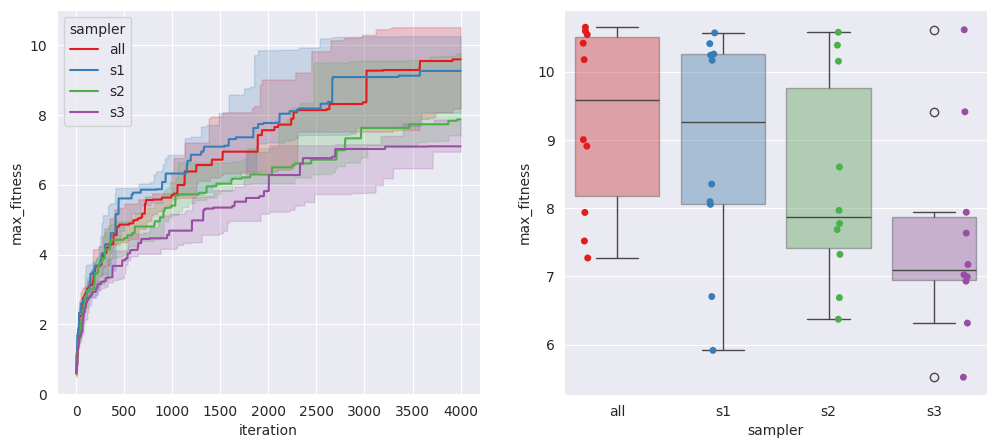

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(df,
             x="iteration",
             y="max_fitness",
             estimator="median",
             errorbar=("pi", 50),
             hue="sampler",
             palette="Set1",
             ax=axs[0]
             )
sns.boxplot(
    final_df,
    x="sampler",
    y="max_fitness",
    hue="sampler",
    palette="Set1",
    boxprops={'alpha': 0.4},
    ax=axs[1]
)
sns.stripplot(final_df,
              x="sampler",
              y="max_fitness",
              hue="sampler",
              palette="Set1",
              dodge=True,
              ax=axs[1])
plt.show()

In [5]:
pairs = []
for s1 in final_df.sampler.unique():
    for s2 in final_df.sampler.unique():
        if s1 != s2 and (s2, s1) not in pairs:
            pairs.append((s1, s2))
            fits1 = final_df[final_df["sampler"] == s1]["max_fitness"].to_list()
            fits2 = final_df[final_df["sampler"] == s2]["max_fitness"].to_list()
            _, p_value = ranksums(fits1, fits2)
            print(f"{s1} vs {s2} -> {p_value}")

all vs s1 -> 0.4496917979688909
all vs s2 -> 0.1305700181157362
all vs s3 -> 0.019109922206844435
s1 vs s2 -> 0.3643461266335529
s1 vs s3 -> 0.09630369202868826
s2 vs s3 -> 0.19876460637323512


## Coverage results
- sampling from repertoire x fosters diversity/coverage in x
- sampling from all repertoires is the second-best option for each, i.e., the best trade-off

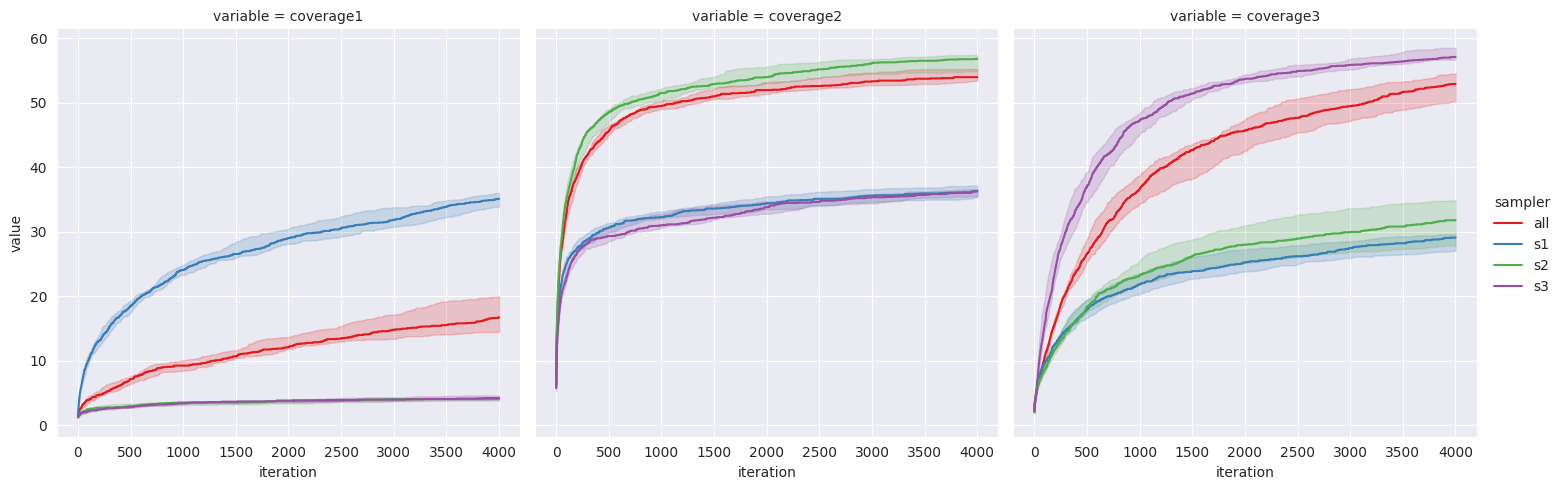

In [6]:
df_wide = pd.melt(df, id_vars=["iteration", "max_fitness", "time", "current_time", "sampler", "seed"],
                  value_vars=["coverage1", "coverage2", "coverage3"])
sns.relplot(df_wide,
            x="iteration",
            y="value",
            col="variable",
            hue="sampler",
            palette="Set1",
            kind="line",
            estimator="median",
            errorbar=("pi", 50),
            )
plt.show()

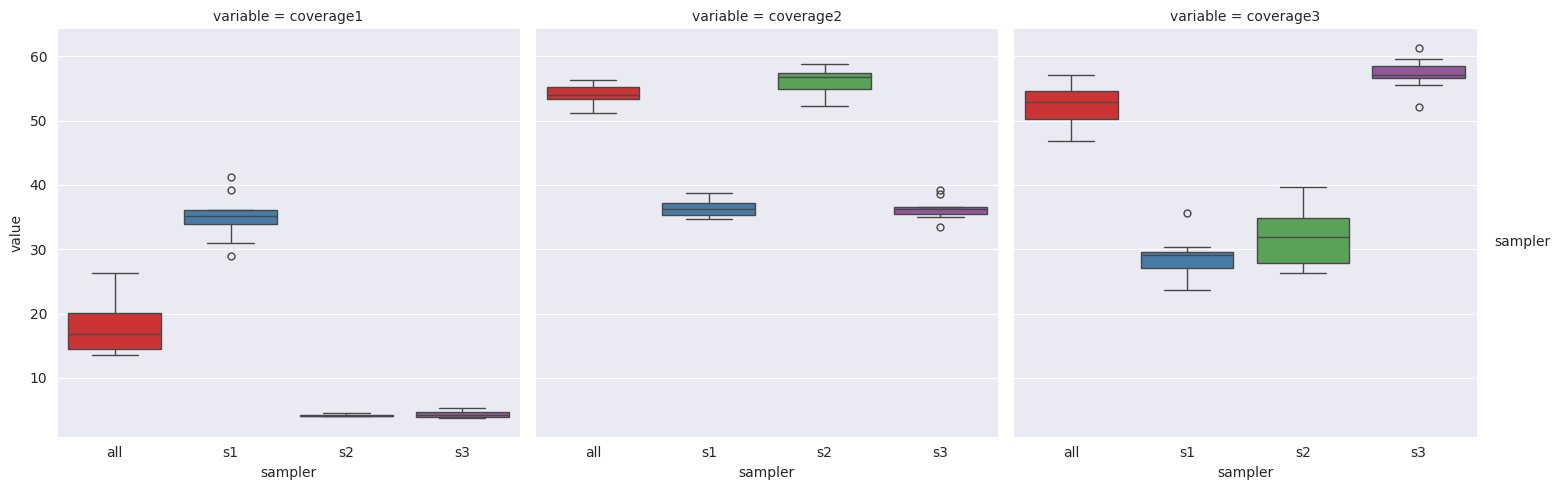

In [7]:
final_df_wide = df_wide[df_wide["iteration"] == max(df_wide["iteration"])]
sns.catplot(final_df_wide,
            x="sampler",
            y="value",
            col="variable",
            hue="sampler",
            palette="Set1",
            kind="box",
            )
plt.show()

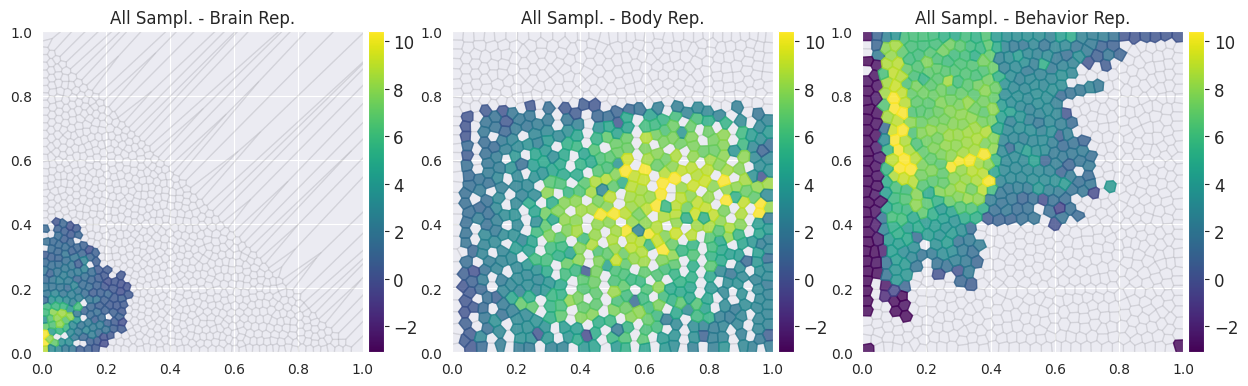

In [8]:
samplers = ["all"]
rep_seed = 0
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
reps = {
    0: "Brain",
    1: "Body",
    2: "Behavior"
}
sams = {
    "all": "All",
}
min_fit, max_fit = jnp.inf, -jnp.inf
for i, sampler in enumerate(samplers):
    base_path = f"../results/me/evo-body-10x10-floor-{sampler}_{rep_seed}"
    for r, ax in enumerate(axs):
        centroids = jnp.load(f"{base_path}/r{r + 1}_centroids.npy")
        fitnesses = jnp.load(f"{base_path}/r{r + 1}_fitnesses.npy")
        curr_min_fit, curr_max_fit = min(fitnesses[fitnesses > -jnp.inf]), max(fitnesses)
        if curr_min_fit < min_fit: min_fit = curr_min_fit
        if curr_max_fit > max_fit: max_fit = curr_max_fit

for i, sampler in enumerate(samplers):
    base_path = f"../results/me/evo-body-10x10-floor-{sampler}_{rep_seed}"
    for r, ax in enumerate(axs):
        centroids = jnp.load(f"{base_path}/r{r + 1}_centroids.npy")
        fitnesses = jnp.load(f"{base_path}/r{r + 1}_fitnesses.npy")
        plot_2d_map_elites_repertoire(centroids, fitnesses, 0, 1, ax=ax, vmin=min_fit, vmax=max_fit)
        ax.set_title(f"{sams[sampler]} Sampl. - {reps[r]} Rep.")
        ax.set_xlabel("")
        ax.set_ylabel("")
plt.show()